# Predicting the probability of credit card repayment default

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
cc=pd.read_csv(r'C:\Users\bryan\Downloads\datasets\UCI_Credit_Card.csv')
pd.set_option('max_columns', None)
cc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Data Information**

There are 25 variables:

ID: ID of each client 

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
cc.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
# Checking for missing data
cc.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
cc_male=cc[cc['SEX']==1]
cc_female=cc[cc['SEX']==2]

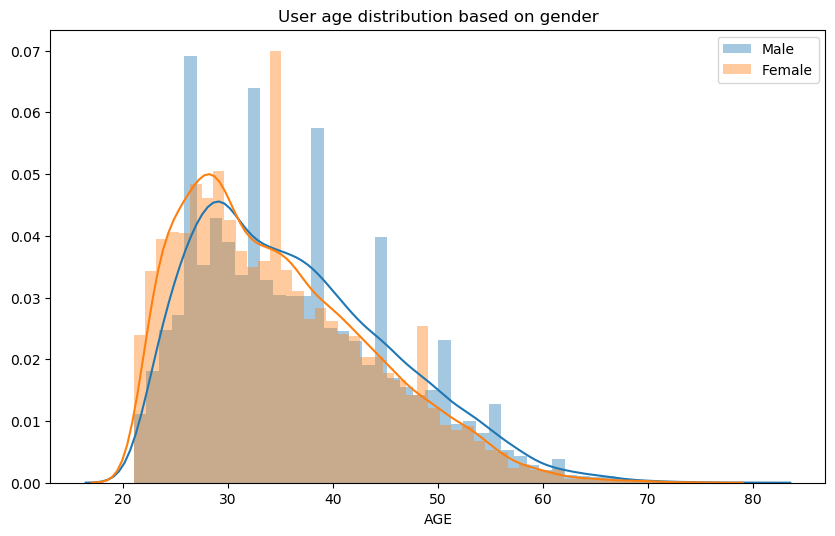

In [7]:
plt.figure(figsize=(10,6),dpi=100)
sns.distplot(cc_male['AGE'],label='Male')
sns.distplot(cc_female['AGE'],label='Female')
plt.title('User age distribution based on gender')
plt.legend()

As can be seen above, most of the credit card users are of the 25-30 age group

Text(0.5, 1.0, 'Number of defaulters relative to timely payment')

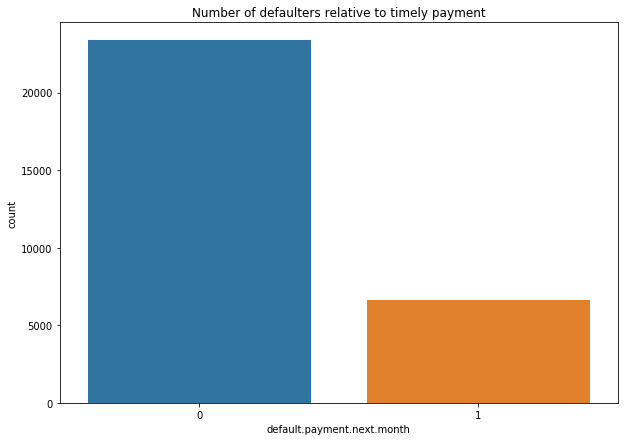

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(cc['default.payment.next.month'])
plt.title('Number of defaulters relative to timely payment')

Text(0.5, 1.0, 'Count of timely payments for Sept. 2005')

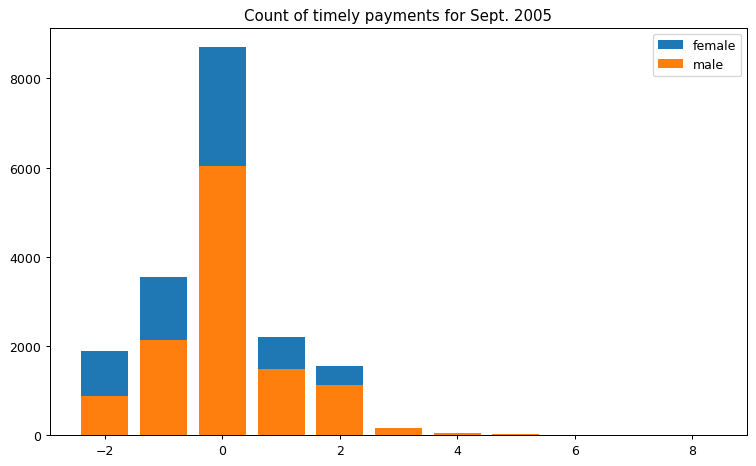

In [9]:
plt.figure(figsize=(10,6),dpi=90)
plt.bar(cc_female['PAY_0'].value_counts().index,cc_female['PAY_0'].value_counts(),label='female')
plt.bar(cc_male['PAY_0'].value_counts().index,cc_male['PAY_0'].value_counts(),label='male')
plt.legend()
plt.title('Count of timely payments for Sept. 2005')

Text(0.5, 1.0, 'Count of timely payments for Aug. 2005')

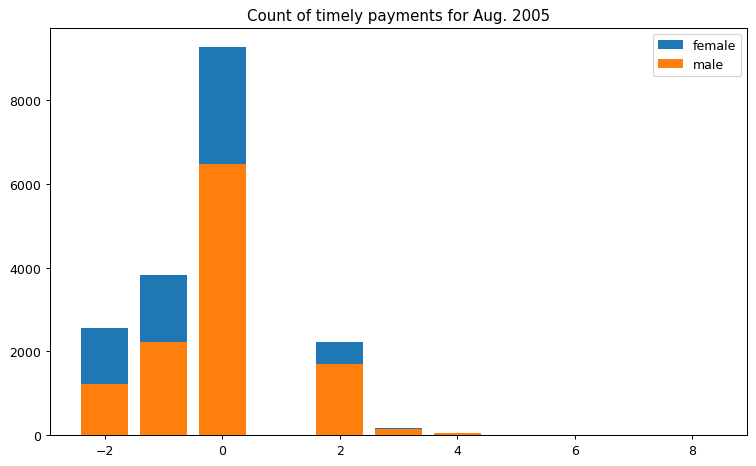

In [10]:
plt.figure(figsize=(10,6),dpi=90)
plt.bar(cc_female['PAY_2'].value_counts().index,cc_female['PAY_2'].value_counts(),label='female')
plt.bar(cc_male['PAY_2'].value_counts().index,cc_male['PAY_2'].value_counts(),label='male')
plt.legend()
plt.title('Count of timely payments for Aug. 2005')

Text(0.5, 1.0, 'Count of timely payments for Jul. 2005')

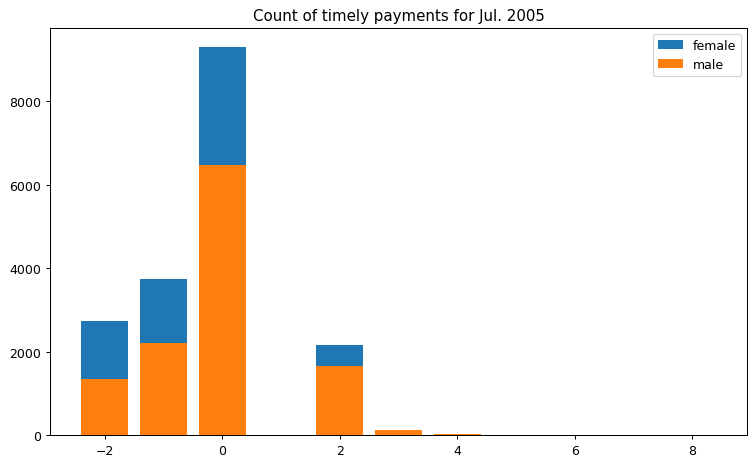

In [11]:
plt.figure(figsize=(10,6),dpi=90)
plt.bar(cc_female['PAY_3'].value_counts().index,cc_female['PAY_3'].value_counts(),label='female')
plt.bar(cc_male['PAY_3'].value_counts().index,cc_male['PAY_3'].value_counts(),label='male')
plt.legend()
plt.title('Count of timely payments for Jul. 2005')

Text(0.5, 1.0, 'Count of timely payments for Jun. 2005')

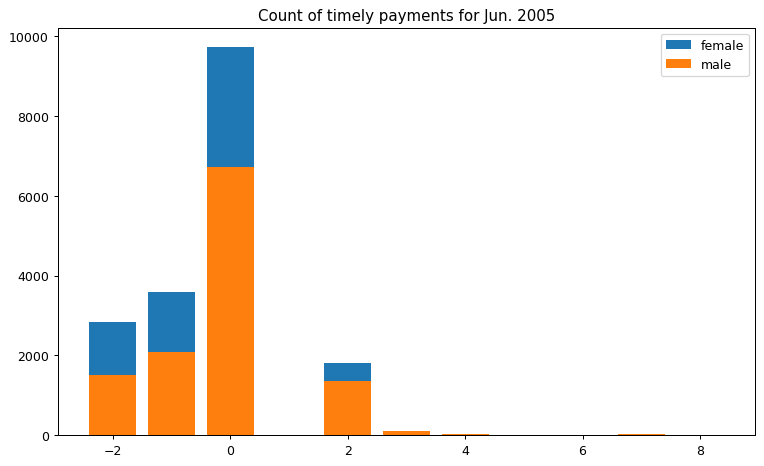

In [12]:
plt.figure(figsize=(10,6),dpi=90)
plt.bar(cc_female['PAY_4'].value_counts().index,cc_female['PAY_4'].value_counts(),label='female')
plt.bar(cc_male['PAY_4'].value_counts().index,cc_male['PAY_4'].value_counts(),label='male')
plt.legend()
plt.title('Count of timely payments for Jun. 2005')

Text(0.5, 1.0, 'Count of timely payments for May 2005')

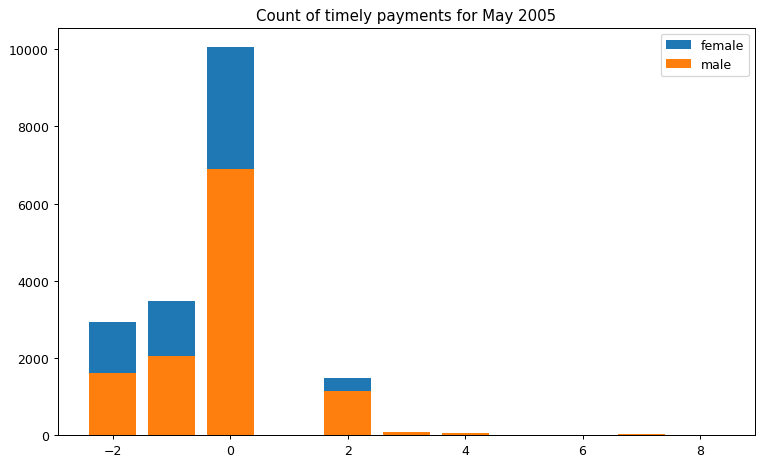

In [13]:
plt.figure(figsize=(10,6),dpi=90)
plt.bar(cc_female['PAY_5'].value_counts().index,cc_female['PAY_5'].value_counts(),label='female')
plt.bar(cc_male['PAY_5'].value_counts().index,cc_male['PAY_5'].value_counts(),label='male')
plt.legend()
plt.title('Count of timely payments for May 2005')

Text(0.5, 1.0, 'Count of timely payments for Apr. 2005')

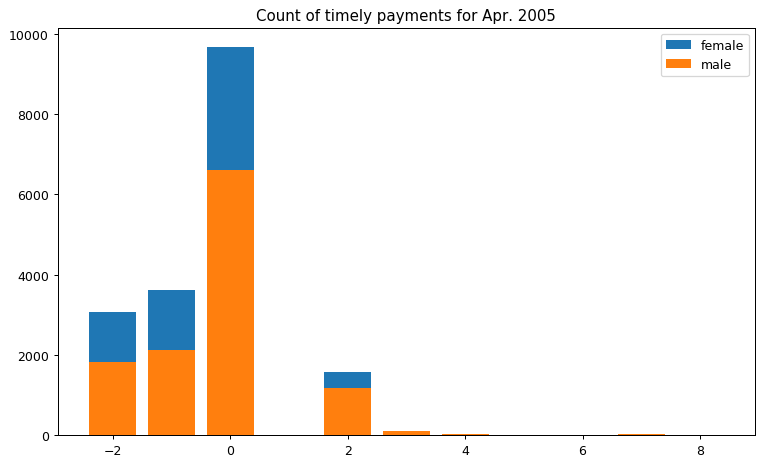

In [14]:
plt.figure(figsize=(10,6),dpi=90)
plt.bar(cc_female['PAY_6'].value_counts().index,cc_female['PAY_6'].value_counts(),label='female')
plt.bar(cc_male['PAY_6'].value_counts().index,cc_male['PAY_6'].value_counts(),label='male')
plt.legend()
plt.title('Count of timely payments for Apr. 2005')

In [15]:
print('Jul Defaults',len(cc[cc['PAY_3']==2]))
print('Aug Defaults', len(cc[cc['PAY_2']==2]))
print('Sept Defaults',len(cc[cc['PAY_0']==2]))

Jul Defaults 3819
Aug Defaults 3927
Sept Defaults 2667


From the barcharts above, it is clear that the maximum number of timely payments occurred in May 2005 and the highest number of delays(2 months) occured in August 2005

It is also very clear that the Females have a better track record of timely payment than Males.

Text(0.5, 0, 'Martial status')

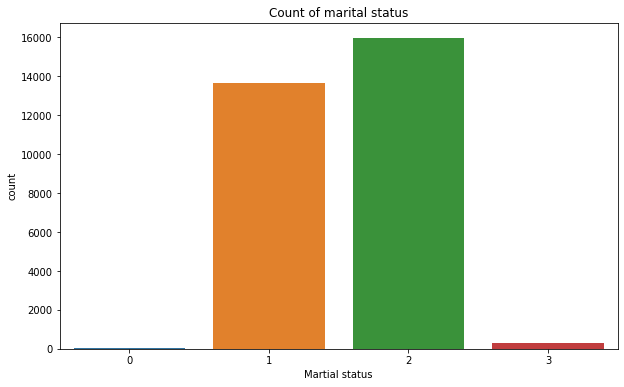

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(cc['MARRIAGE'])
plt.title('Count of marital status')
plt.xlabel('Martial status')

Text(0.5, 1.0, 'Count of educational level')

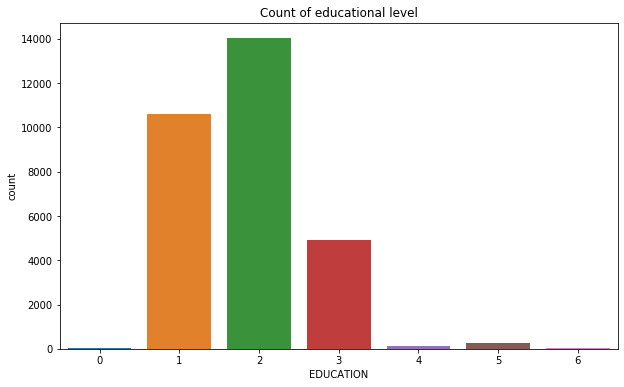

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(cc['EDUCATION'])
plt.title('Count of educational level')

This shows that most of the people in the dataset have a univeristy or a graduate degree which makes sense as this increases the ease of avaling a credit card

In [18]:
df_ed=cc.groupby('EDUCATION').sum()['default.payment.next.month'].reset_index()
df_ed

,EDUCATION,default.payment.next.month
0,0,0
1,1,2036
2,2,3330
3,3,1237
4,4,7
5,5,18
6,6,8


In [19]:
df_ed_tot=cc['EDUCATION'].value_counts().reset_index().rename(columns={'index':'EDUCATION','EDUCATION':'total number'})
df_ed_tot

,EDUCATION,total number
0,2,14030
1,1,10585
2,3,4917
3,5,280
4,4,123
5,6,51
6,0,14


In [20]:
df_education_payments=df_ed.join(df_ed_tot.set_index("EDUCATION"),on='EDUCATION')
df_education_payments['percentage_defaults']=df_education_payments['default.payment.next.month']/df_education_payments['total number']*100
df_education_payments.drop(index=0,inplace=True)
df_education_payments

,EDUCATION,default.payment.next.month,total number,percentage_defaults
1,1,2036,10585,19.234766
2,2,3330,14030,23.734854
3,3,1237,4917,25.157616
4,4,7,123,5.691057
5,5,18,280,6.428571
6,6,8,51,15.686275


Text(0.5, 1.0, 'Percentage of defaulters segmented on education')

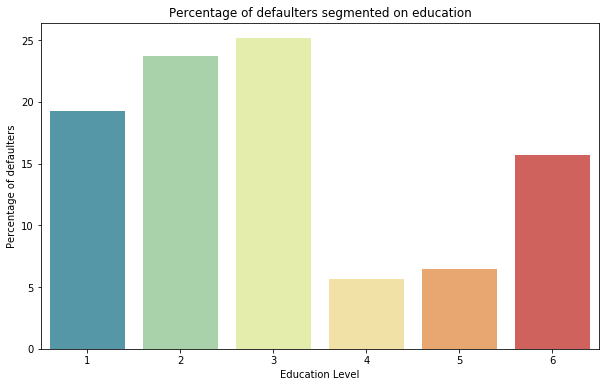

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(df_education_payments['EDUCATION'],df_education_payments['percentage_defaults'],palette='Spectral_r')
plt.xlabel('Education Level')
plt.ylabel('Percentage of defaulters')
plt.title('Percentage of defaulters segmented on education')

In [22]:
cc

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


Text(0.5, 1.0, 'Bill amount quartiles based on marriage status')

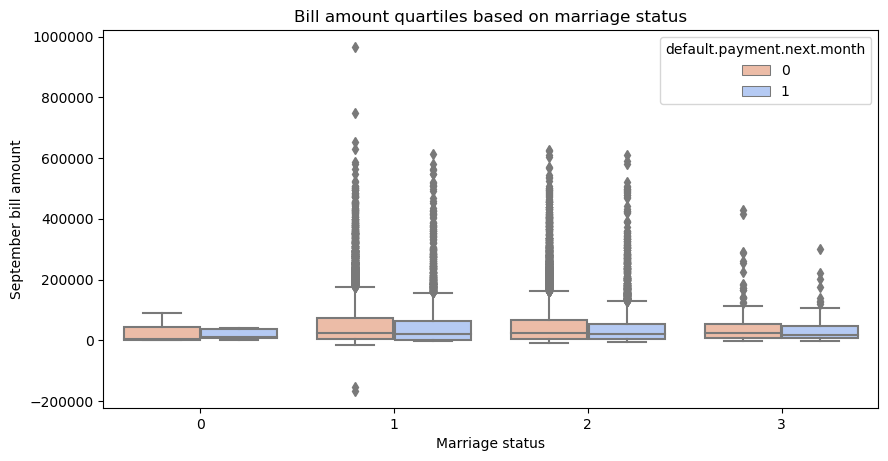

In [23]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x='MARRIAGE',y='BILL_AMT1',data=cc,hue='default.payment.next.month',palette='coolwarm_r')
plt.xlabel('Marriage status')
plt.ylabel('September bill amount')
plt.title('Bill amount quartiles based on marriage status')

# Building and running an initial classification model

In [24]:
x=cc.drop('default.payment.next.month',axis=1)
y=cc['default.payment.next.month']

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
scale=StandardScaler()
x_sc=scale.fit_transform(x)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.25, random_state=101)

**Logistic Regression**

In [28]:
log=LogisticRegression(C=0.0001)
log.fit(x_train,y_train)
ypred_log=log.predict(x_test)

In [29]:
print(classification_report(y_test,ypred_log))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5875
           1       0.71      0.02      0.04      1625

    accuracy                           0.79      7500
   macro avg       0.75      0.51      0.46      7500
weighted avg       0.77      0.79      0.70      7500



In [30]:
confusion_matrix(y_test,ypred_log)

array([[5860,   15],
       [1588,   37]], dtype=int64)

In [31]:
print('Initial run accuracy: ',accuracy_score(y_test,ypred_log))

Initial run accuracy:  0.7862666666666667


Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

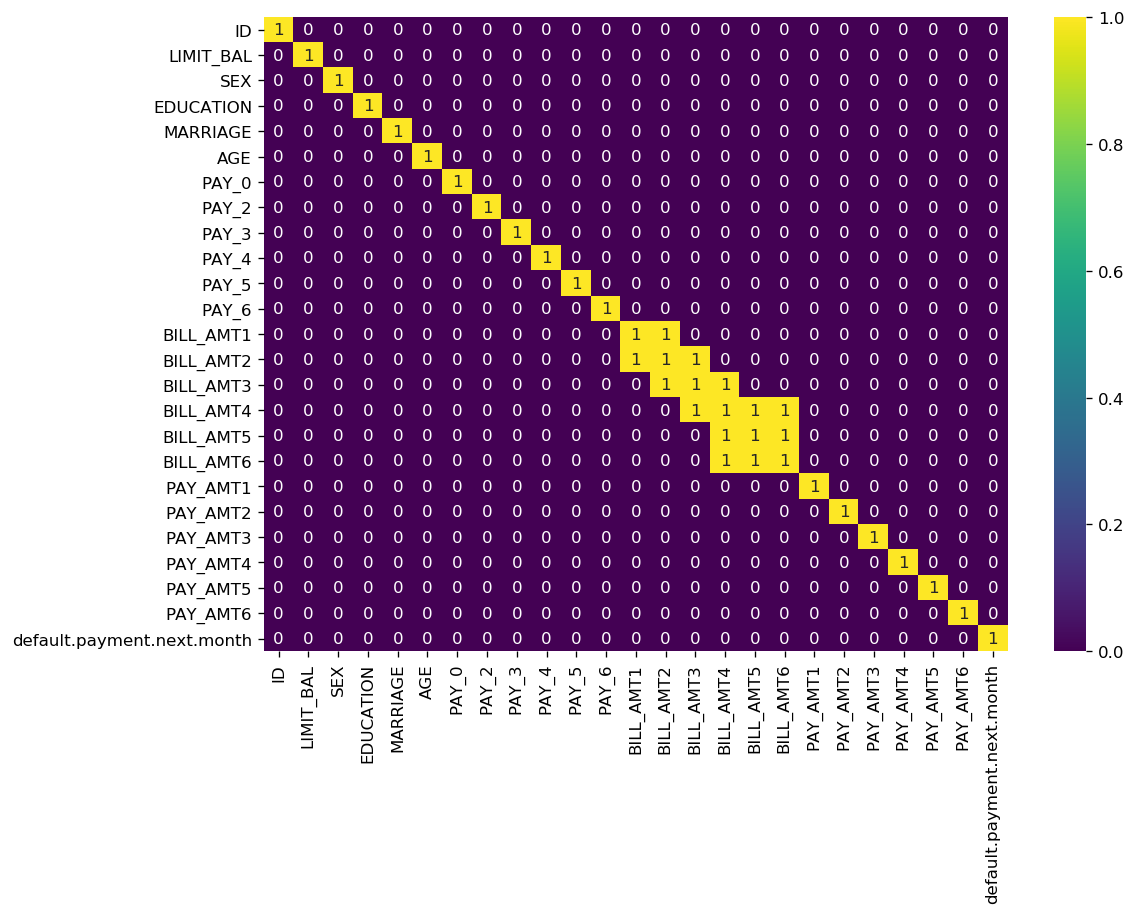

In [33]:
# Creating a heatap to visualize highly positively correlated(>90%) predictor variables
plt.figure(figsize=(10,7),dpi=120)
sns.heatmap(cc.corr()>0.9,annot=True,cmap='viridis')

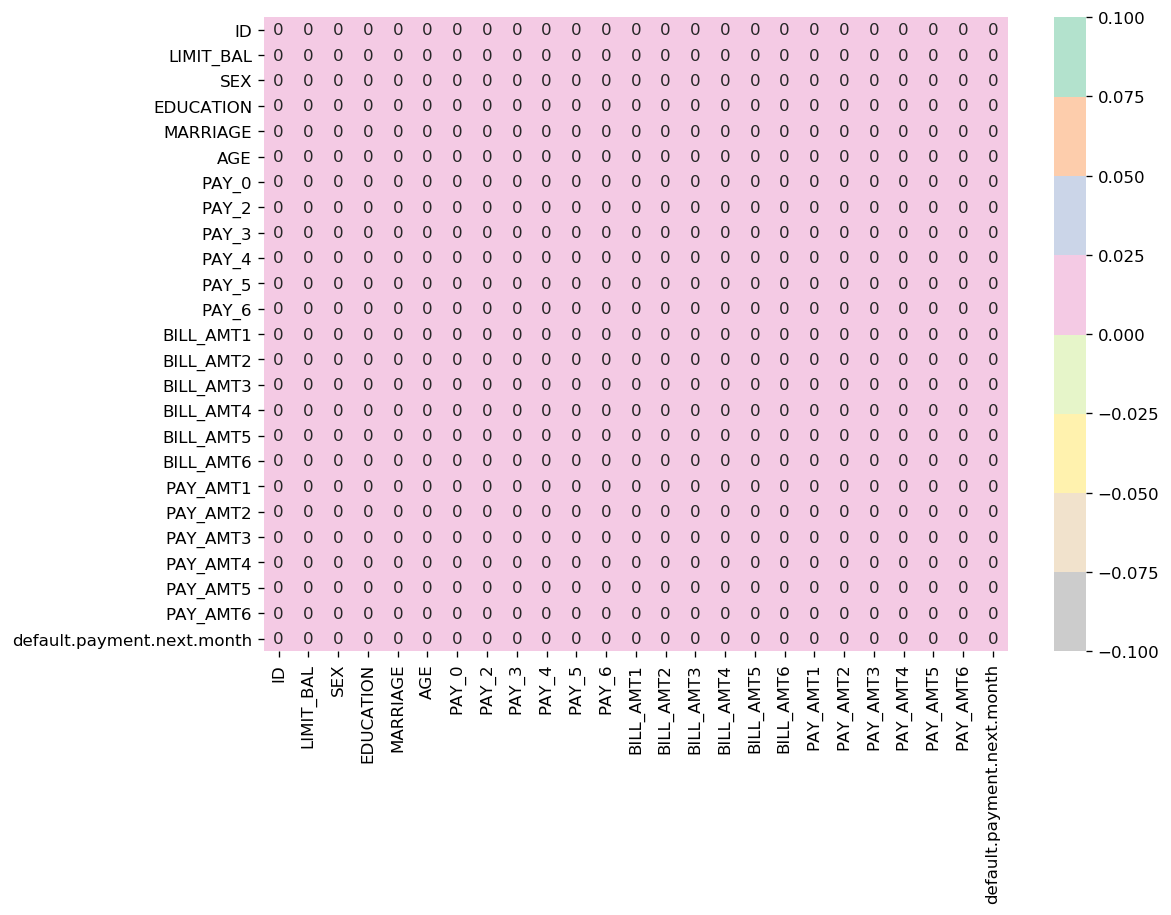

In [34]:
# Creating a heatap to visualize highly negatively correlated(>90%) predictor variables
plt.figure(figsize=(10,7),dpi=120)
sns.heatmap(cc.corr()<-0.9,annot=True,cmap='Pastel2_r')

From the above heatmaps, it is clear which features are highly correlated. Thus some of these will be dropped before running the hyperparameter tuning algorithm

In [35]:
# list of highly correlated features
highly_corr=['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
cc_model=cc.drop(highly_corr,axis=1)
cc_model.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [36]:
x=cc_model.drop('default.payment.next.month',axis=1)
y=cc_model['default.payment.next.month']

In [37]:
scale=StandardScaler()
x_sc=scale.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.25, random_state=101)

In [38]:
param={'C':[0.00001,0.0001,0.001,0.01,0.1,1,1.1,10],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':[100,1000,5000,10000]}
grid_log=GridSearchCV(estimator=log,param_grid=param,cv=5,verbose=1)

In [39]:
grid_log.fit(x_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=0.0001, class_weight=None,
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 1.1, 10],
                         'max_iter': [100, 1000, 5000, 10000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
         

In [40]:
grid_log.best_params_

{'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}

In [41]:
ypred_log_tuned=grid_log.predict(x_test)

In [42]:
confusion_matrix(y_test,ypred_log_tuned)

array([[5745,  130],
       [1248,  377]], dtype=int64)

In [43]:
print(classification_report(y_test,ypred_log_tuned))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5875
           1       0.74      0.23      0.35      1625

    accuracy                           0.82      7500
   macro avg       0.78      0.60      0.62      7500
weighted avg       0.80      0.82      0.78      7500



In [44]:
print('Tuned Logistic Regression accuracy: ',accuracy_score(y_test,ypred_log_tuned))

Tuned Logistic Regression accuracy:  0.8162666666666667


**K Nearest Neighbors**

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
accuracy=[]
for n in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    ypred_knn=knn.predict(x_test)
    acc=accuracy_score(y_test,ypred_knn)
    accuracy.append(acc)

Text(0.5, 1.0, 'Accuracy score plotted against K threshold')

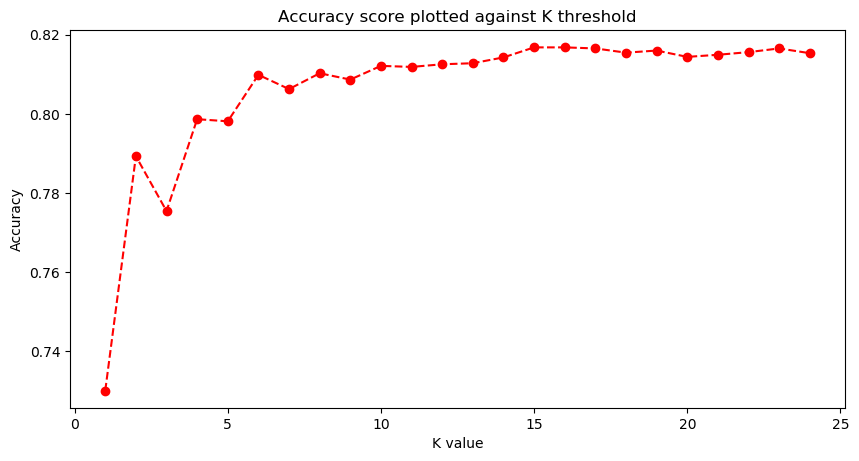

In [47]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(range(1,25),accuracy,ls='--',marker='o',color='r')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Accuracy score plotted against K threshold')

In [48]:
print('Highest accuracy value:',max(accuracy))
print('Best K value: ',accuracy.index(max(accuracy))+1)

Highest accuracy value: 0.8168
Best K value:  15


In [49]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
ypred_knn=knn.predict(x_test)
acc=accuracy_score(y_test,ypred_knn)
accuracy.append(acc)

In [50]:
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5875
           1       0.65      0.33      0.44      1625

    accuracy                           0.82      7500
   macro avg       0.75      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



In [51]:
print('KNN accuracy: ',accuracy_score(y_test,ypred_knn))

KNN accuracy:  0.8168


**Decision Tree Classifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dtree=DecisionTreeClassifier()
param = {'criterion':['gini','entropy'],'max_depth':[5,10,15,20,25,30]}
grid_tree=GridSearchCV(estimator=dtree,param_grid=param,cv=5)

In [54]:
grid_tree.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [55]:
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [56]:
ypred_tree=grid_tree.predict(x_test)

In [57]:
print(classification_report(y_test,ypred_tree))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      5875
           1       0.69      0.36      0.47      1625

    accuracy                           0.83      7500
   macro avg       0.77      0.66      0.68      7500
weighted avg       0.81      0.83      0.80      7500



In [58]:
print(confusion_matrix(y_test,ypred_tree))

[[5610  265]
 [1038  587]]


In [59]:
print('Deciion tree classifier accuracy: ',accuracy_score(y_test,ypred_tree))

Deciion tree classifier accuracy:  0.8262666666666667


**SVC Classifier**

In [60]:
from sklearn.svm import SVC

In [61]:
svc=SVC(n)

In [62]:
params={'C':[0.001,0.01,0.1,1],'kernel':[ 'rbf', 'sigmoid']}
grid_svc=GridSearchCV(estimator=svc,param_grid=params,cv=5,verbose=1)

In [63]:
grid_svc.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  6.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=24, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [64]:
grid_svc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [65]:
ypred_svc=grid_svc.predict(x_test)

In [66]:
print(classification_report(y_test,ypred_svc))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5875
           1       0.70      0.32      0.44      1625

    accuracy                           0.82      7500
   macro avg       0.77      0.64      0.67      7500
weighted avg       0.81      0.82      0.80      7500



In [67]:
confusion_matrix(y_test,ypred_svc)

array([[5651,  224],
       [1100,  525]], dtype=int64)

In [68]:
print('SVC accuracy: ',accuracy_score(y_test,ypred_svc))

SVC accuracy:  0.8234666666666667


In [69]:
print('CLassification Algorithm Output:' '\n')
print('Tuned Logistic Regression accuracy: ',accuracy_score(y_test,ypred_log_tuned))
print('KNN accuracy: ',accuracy_score(y_test,ypred_knn))
print('Decision tree classifier accuracy: ',accuracy_score(y_test,ypred_tree))
print('SVC  accuracy: ',accuracy_score(y_test,ypred_svc))

CLassification Algorithm Output:

Tuned Logistic Regression accuracy:  0.8162666666666667
KNN accuracy:  0.8168
Decision tree classifier accuracy:  0.8262666666666667
SVC  accuracy:  0.8234666666666667


# Conclusion

The aim of this project was to predict the probability of credit card holders defaulting on their repayments. Classification algorithms such as logistic regression, K nearest neighbors, Decision tree and Support vecotr classifier were used to predict whether the holder would be classified as a defaulter or not.

The best performing algorithm for this dataset was the Decision tree classifier with an accuracy of 82.8% followed by the Support vector classifier with an accuracy of 82.21%